In [1]:
import warnings 

import pysgpp
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from pysgpp.extensions.datadriven.uq.plot.plot1d import plotSG1d
from pysgpp.extensions.datadriven.uq.plot.plot2d import plotSG2d,plotGrid2d
from pysgpp.extensions.datadriven.uq.plot.plot3d import plotSG3d
from pysgpp.extensions.datadriven.uq.plot.plotGrid import plotGrid

from scipy import interpolate
from full_grid_representation import full_grid_representation

warnings.filterwarnings('ignore');
plt.style.use('ggplot');
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 12);

Populating the interactive namespace from numpy and matplotlib


Here, we aim to create a two-dimensional regular sparse grid with grid points $\vec{x}_j \in [0, 1]^2$ using piecewise bilinear basis functions $\varphi_j\colon [0, 1]^2 \to \mathbb{R}$. We then interpolate the function:

<h3 align="center"> $f\colon [0, 1]^2 \to \mathbb{R},\quad f(x_0, x_1) := 16 (x_0 - 1) x_0 (x_1 - 1) x_1$ </h3> 

with:
<h3 align="center">$u\colon [0, 1]^2 \to \mathbb{R},\quad u(x_0, x_1) := \sum_{j=0}^{N-1} \alpha_j \varphi_j(x_0, x_1)$</h3> 

by calculating the coefficients $\alpha_j$ such that $u(x_j)=f(x_j)$ $\forall j$. After this analysis, we will perform the same analysis using a full grid for the purpose of comparison.

In [2]:
f = lambda x0, x1: 16.0 * (x0 - 1.0) * x0 * (x1 - 1.0) * x1

X = np.linspace(0, 1, 500)
Y = np.linspace(0, 1, 500)
X, Y = np.meshgrid(X, Y)

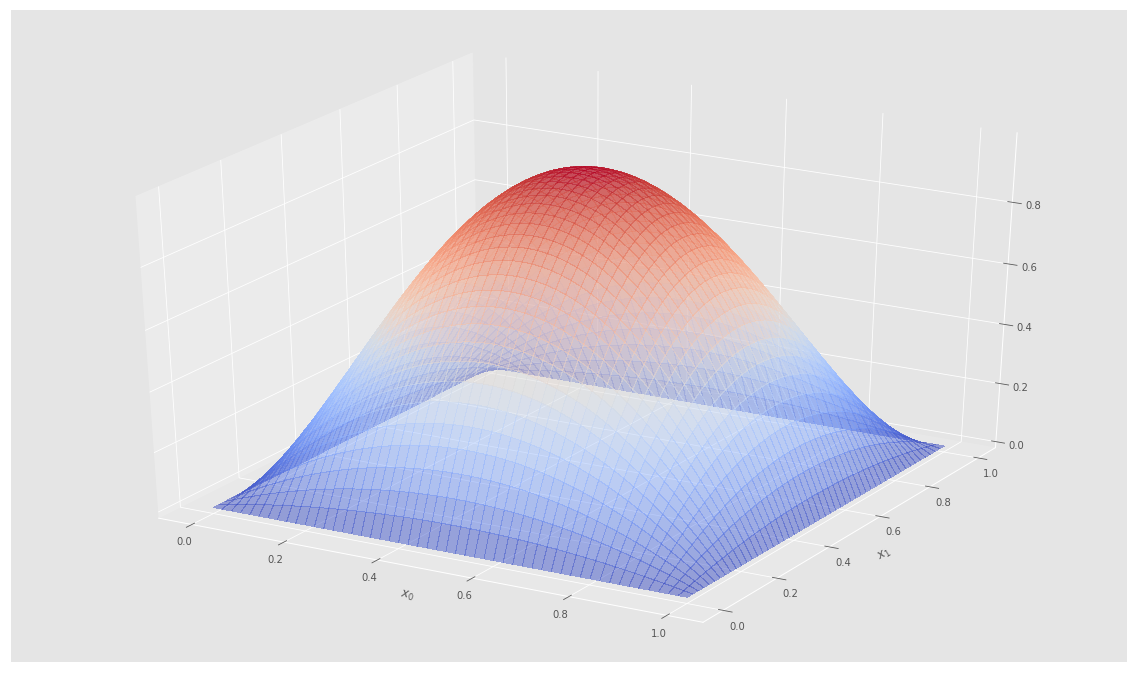

In [3]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, f(X, Y), cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.5)
ax.set_xlabel('$x_0$'); ax.set_ylabel('$x_1$');

In [4]:
def print_output():
    def eval_point():
        p = pysgpp.DataVector(2)
        p[0] = P[0]
        p[1] = P[1]
        return pysgpp.createOperationEval(grid).eval(alpha, p)
    
    plotSG3d(grid, alpha)
    ax = plt.gca()
    plt.show()
    
    plotGrid2d(grid)
    for P, c in zip(Ps, colors):
        plt.scatter(*P, color = c, s=100)
    plt.show()
    
    print "number of grid points:  {}\n\n".format(gridStorage.getSize())
    for P, c in zip(Ps, colors):
        print '({0})'.format(c)
        print "f({0}, {1}) = {output}".format(*P, output=f(*P))
        print "u({0}, {1}) = {output}".format(*P, output=eval_point())
        print 'abs(delta) = {}\n\n'.format(f(*P) - eval_point())

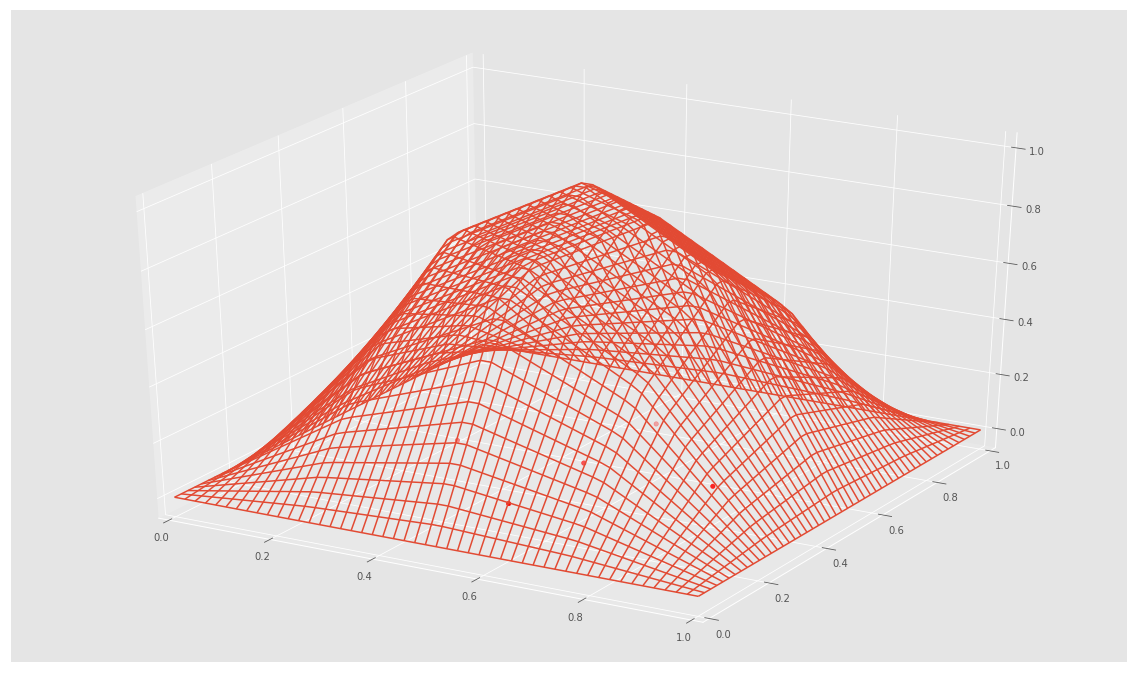

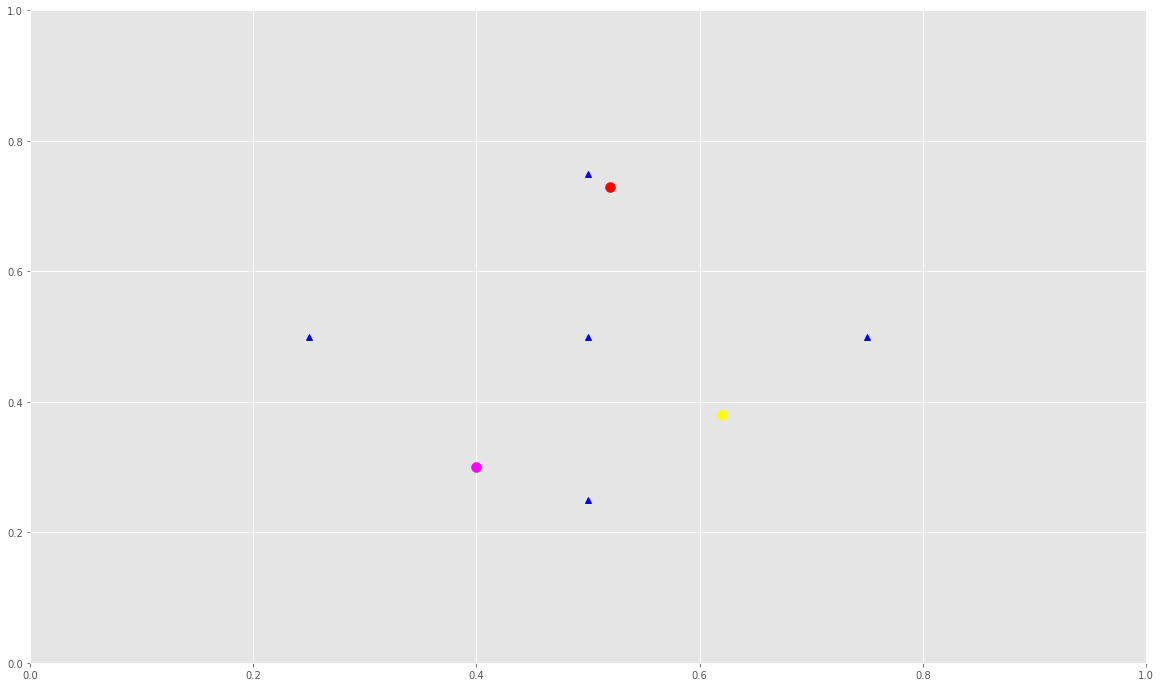

number of grid points:  5


(red)
f(0.52, 0.73) = 0.78713856
u(0.52, 0.73) = 0.75
abs(delta) = 0.03713856


(magenta)
f(0.4, 0.3) = 0.8064
u(0.4, 0.3) = 0.7
abs(delta) = 0.1064


(yellow)
f(0.62, 0.38) = 0.88811776
u(0.62, 0.38) = 0.76
abs(delta) = 0.12811776




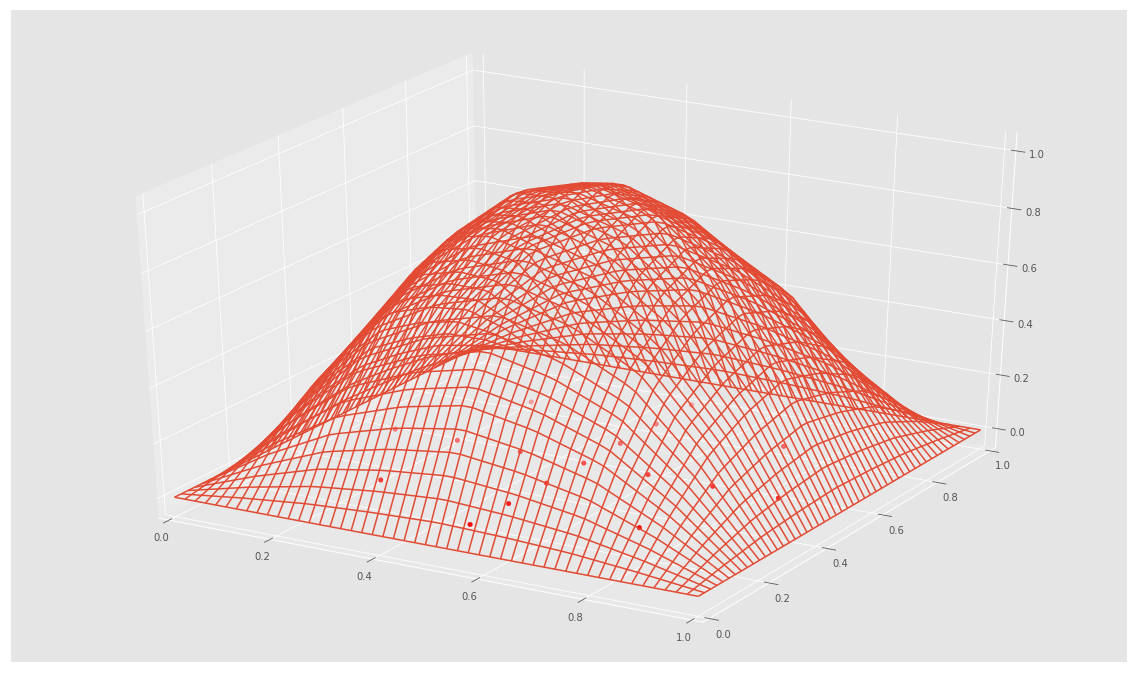

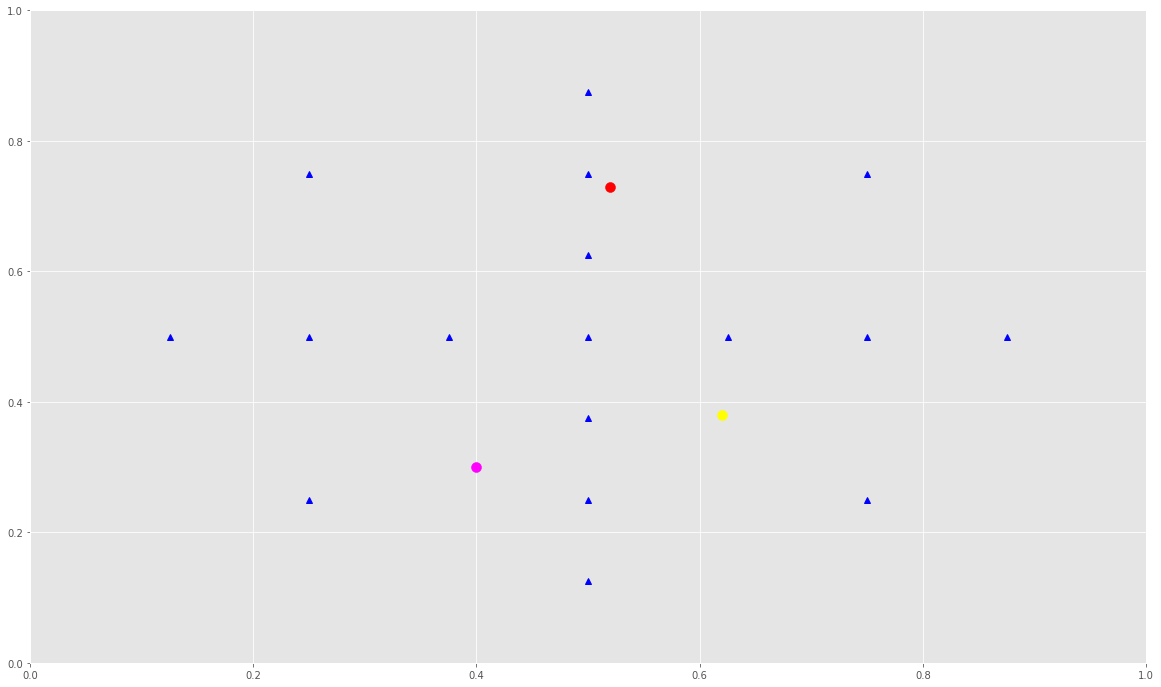

number of grid points:  17


(red)
f(0.52, 0.73) = 0.78713856
u(0.52, 0.73) = 0.7696
abs(delta) = 0.01753856


(magenta)
f(0.4, 0.3) = 0.8064
u(0.4, 0.3) = 0.77
abs(delta) = 0.0364


(yellow)
f(0.62, 0.38) = 0.88811776
u(0.62, 0.38) = 0.8656
abs(delta) = 0.02251776




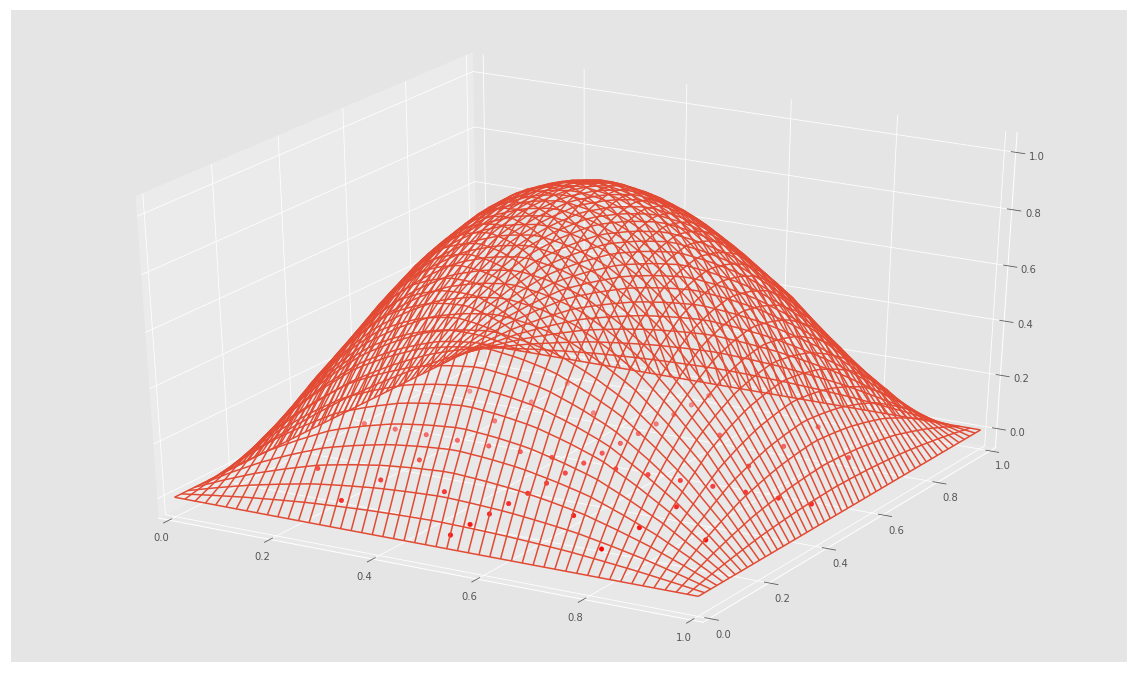

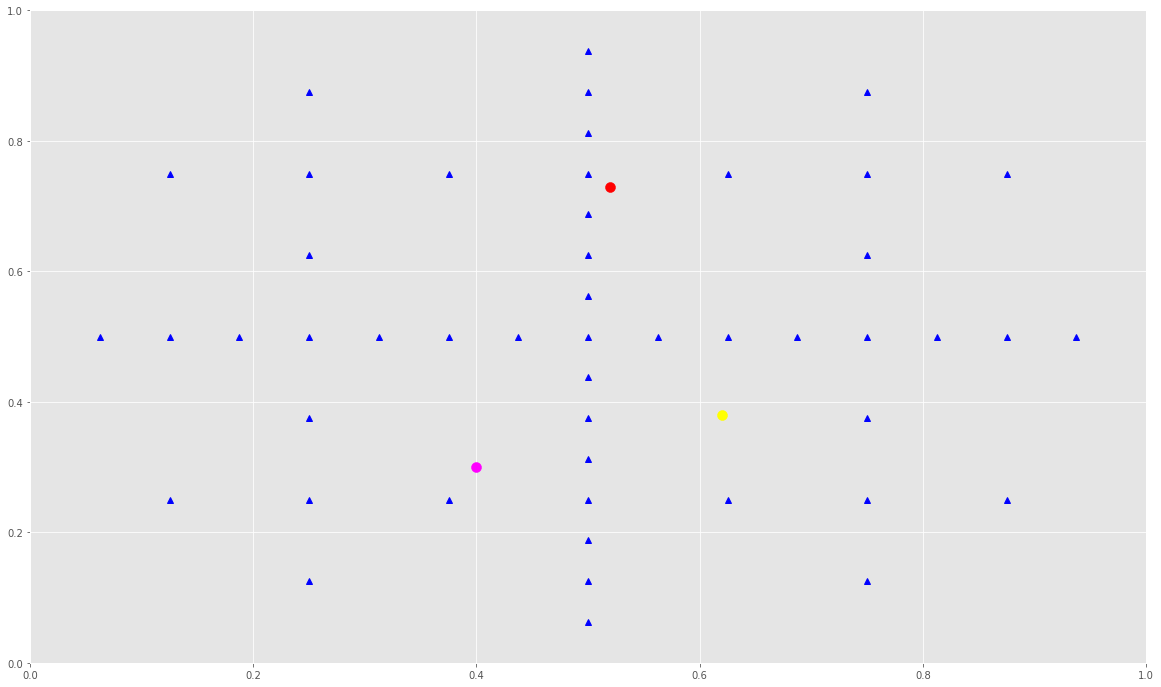

number of grid points:  49


(red)
f(0.52, 0.73) = 0.78713856
u(0.52, 0.73) = 0.7796
abs(delta) = 0.00753856


(magenta)
f(0.4, 0.3) = 0.8064
u(0.4, 0.3) = 0.79625
abs(delta) = 0.01015


(yellow)
f(0.62, 0.38) = 0.88811776
u(0.62, 0.38) = 0.8819
abs(delta) = 0.00621776




In [5]:
colors = ['red', 'magenta', 'yellow'] 
Ps = [(0.52, 0.73), (0.4, 0.3),  (0.62, 0.38)]

mesh_sizes = []
for level in range(2, 5):
    grid = pysgpp.Grid.createLinearGrid(2)
    gridStorage = grid.getStorage()
    grid.getGenerator().regular(level)
    
    alpha = pysgpp.DataVector(gridStorage.getSize())
    alpha.setAll(0.0)
    
    for i in xrange(gridStorage.getSize()):
        gp = gridStorage.getPoint(i)
        alpha[i] = f(gp.getStandardCoordinate(0), gp.getStandardCoordinate(1))
        
    pysgpp.createOperationHierarchisation(grid).doHierarchisation(alpha)
    print_output()
    
    mesh_sizes.append(gridStorage.getSize())

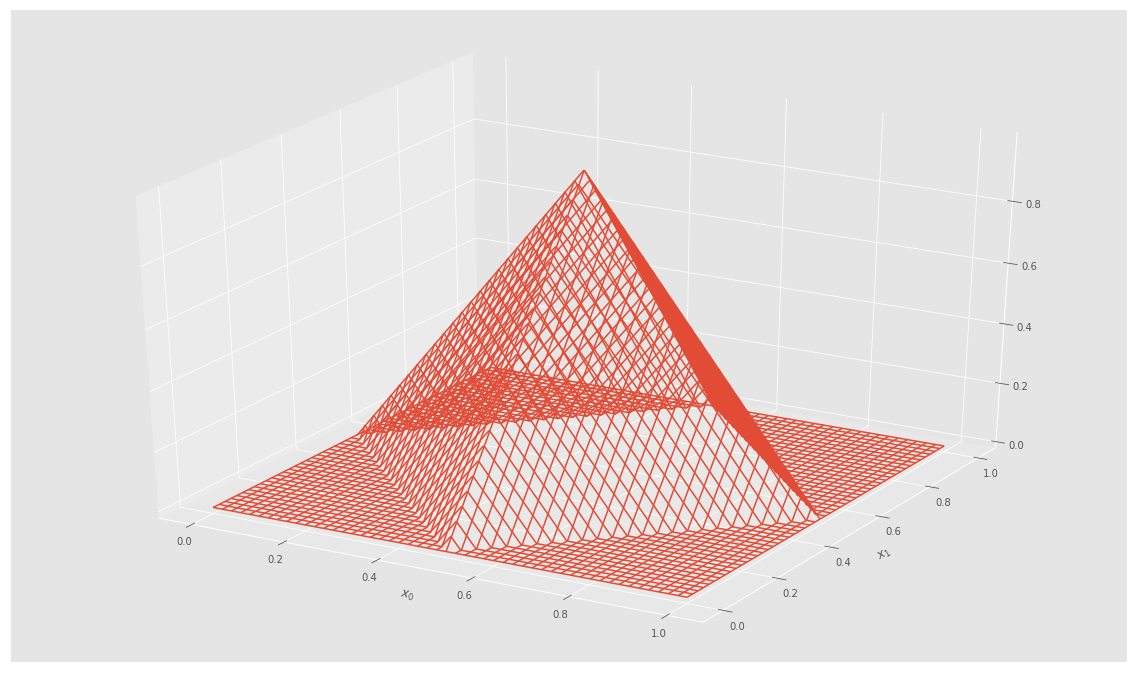

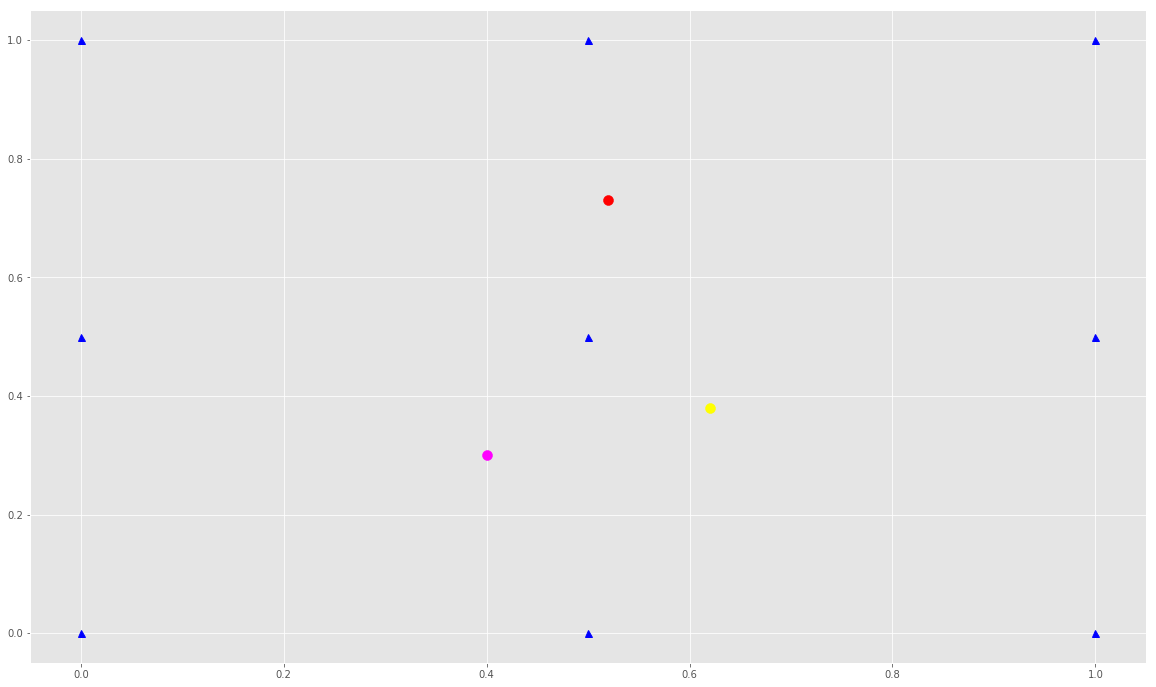

number of grid points:  9


(red)
f(0.52, 0.73) = 0.78713856
u(0.52, 0.73) = 0.5
abs(delta) = 0.28713856


(magenta)
f(0.4, 0.3) = 0.8064
u(0.4, 0.3) = 0.4
abs(delta) = 0.4064


(yellow)
f(0.62, 0.38) = 0.88811776
u(0.62, 0.38) = 0.52
abs(delta) = 0.36811776




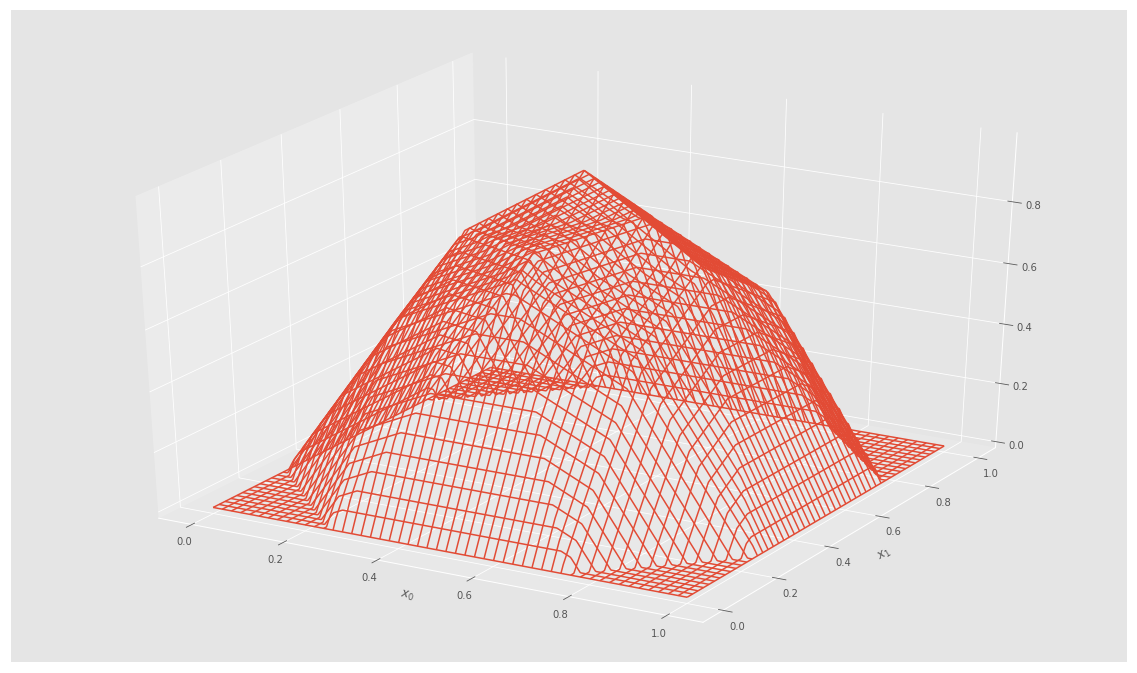

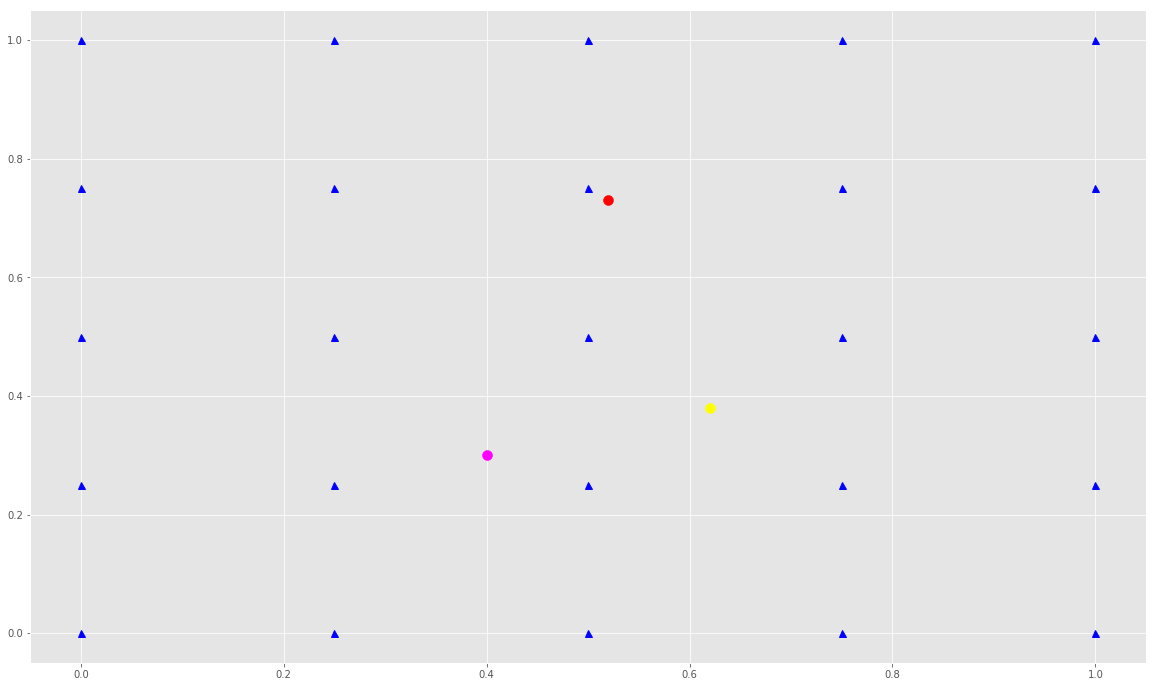

number of grid points:  25


(red)
f(0.52, 0.73) = 0.78713856
u(0.52, 0.73) = 0.75
abs(delta) = 0.03713856


(magenta)
f(0.4, 0.3) = 0.8064
u(0.4, 0.3) = 0.7125
abs(delta) = 0.0939


(yellow)
f(0.62, 0.38) = 0.88811776
u(0.62, 0.38) = 0.76
abs(delta) = 0.12811776




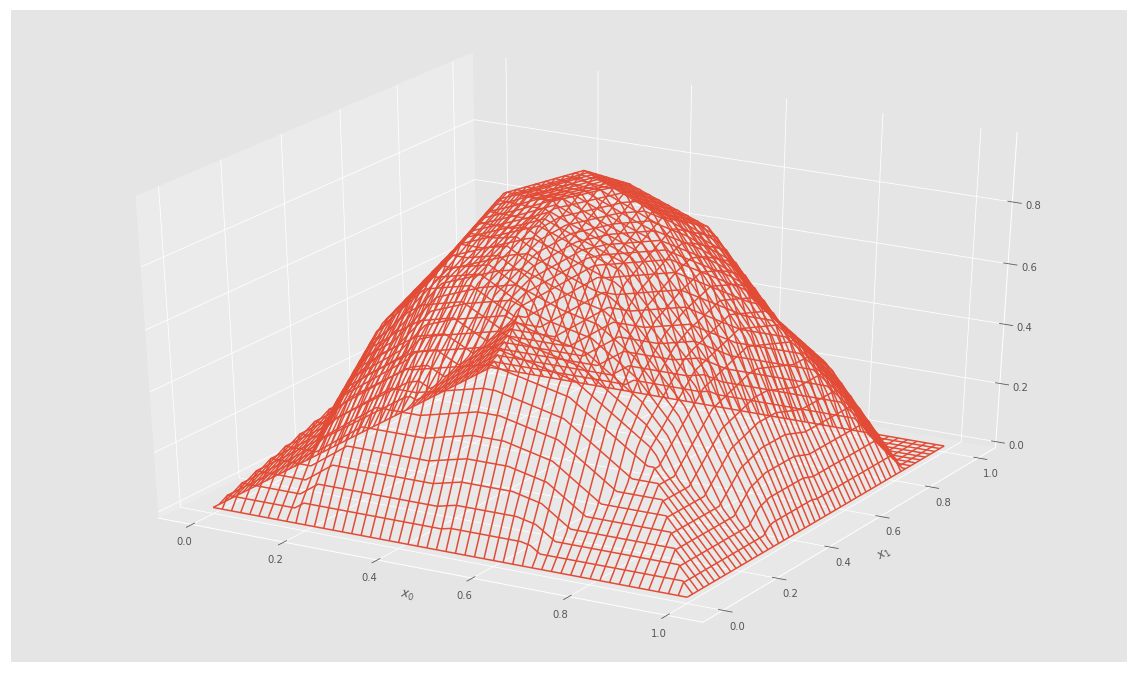

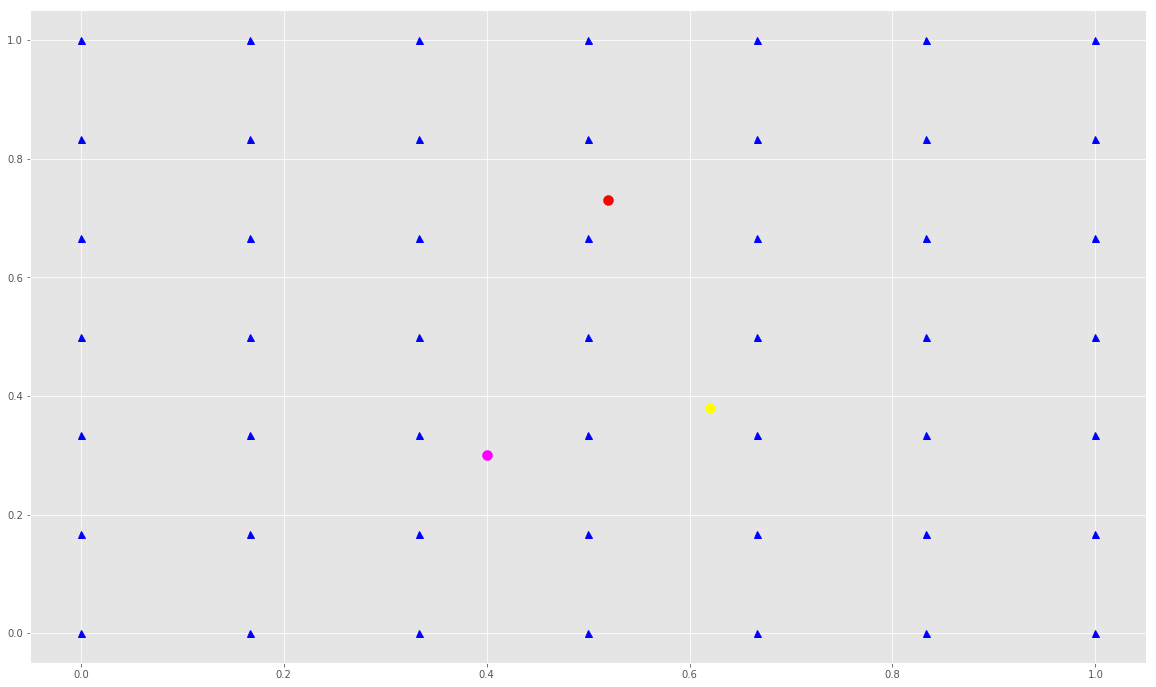

number of grid points:  49


(red)
f(0.52, 0.73) = 0.78713856
u(0.52, 0.73) = 0.754814814815
abs(delta) = 0.0323237451852


(magenta)
f(0.4, 0.3) = 0.8064
u(0.4, 0.3) = 0.77037037037
abs(delta) = 0.0360296296296


(yellow)
f(0.62, 0.38) = 0.88811776
u(0.62, 0.38) = 0.845432098765
abs(delta) = 0.0426856612346




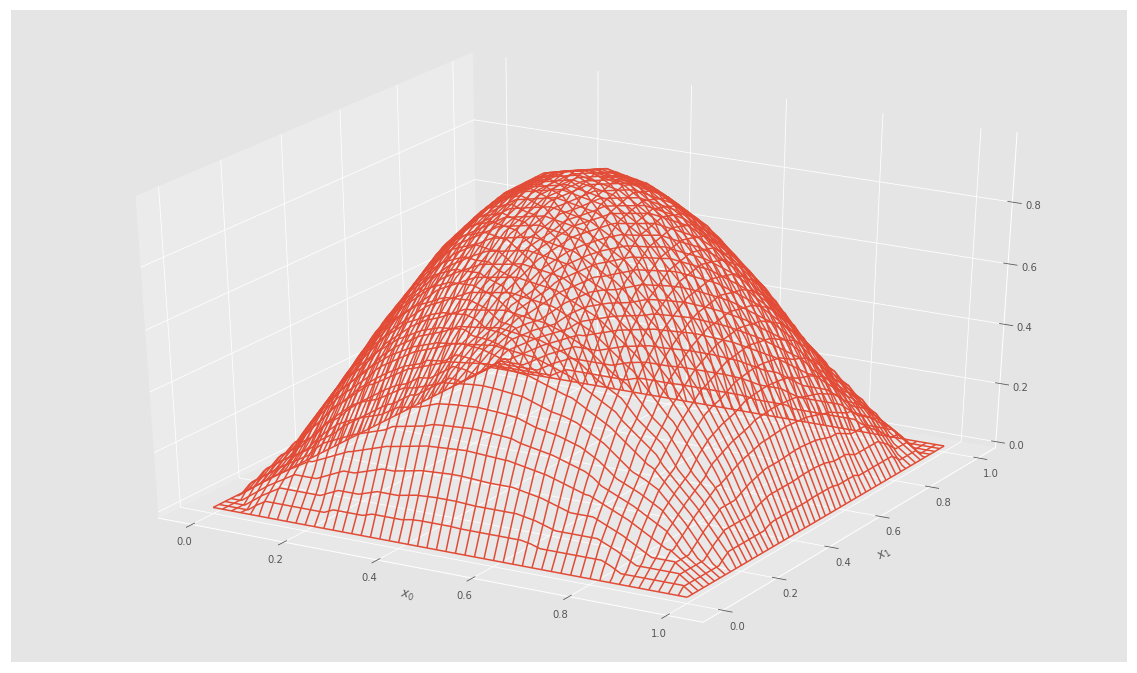

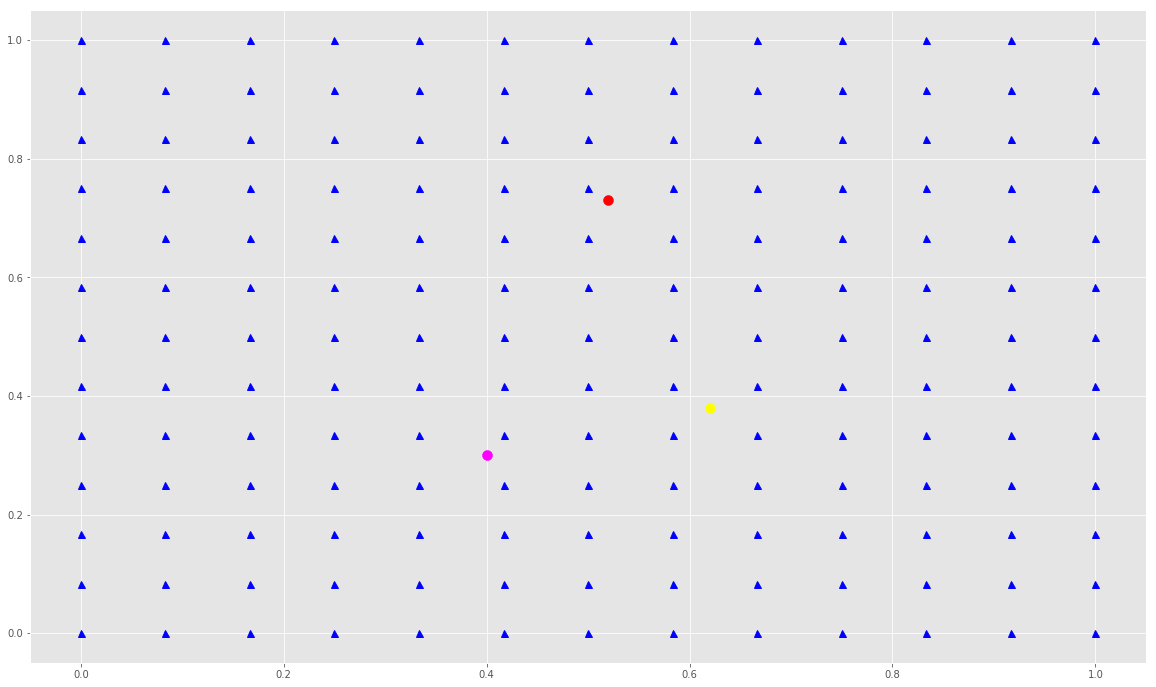

number of grid points:  169


(red)
f(0.52, 0.73) = 0.78713856
u(0.52, 0.73) = 0.778333333333
abs(delta) = 0.00880522666667


(magenta)
f(0.4, 0.3) = 0.8064
u(0.4, 0.3) = 0.797685185185
abs(delta) = 0.00871481481481


(yellow)
f(0.62, 0.38) = 0.88811776
u(0.62, 0.38) = 0.876975308642
abs(delta) = 0.011142451358




In [6]:
mesh_sizes.append(13**2)
for mesh_size in mesh_sizes:
    n = np.ceil(np.sqrt(mesh_size))
    x = np.linspace(0, 1, n)
    y = np.linspace(0, 1, n)
    xx, yy = np.meshgrid(x, y)
    interp = interpolate.LinearNDInterpolator(zip(xx.flat, yy.flat), f(xx, yy).flat)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_wireframe(X, Y, interp(X, Y), color='#e24b35')
    ax.set_xlabel('$x_0$'); ax.set_ylabel('$x_1$');

    plt.show()

    plt.plot(xx, yy, "^b", markersize=7)
    for P, c in zip(Ps, colors):
        plt.scatter(*P, color = c, s=100)
    plt.show()
        
    print "number of grid points:  {}\n\n".format(len(xx.flat))
    
    for P, c in zip(Ps, colors):
        print '({0})'.format(c)
        print "f({0}, {1}) = {output}".format(*P, output=f(*P))
        print "u({0}, {1}) = {output}".format(*P, output=interp(P))
        print 'abs(delta) = {}\n\n'.format(f(*P) - interp(P))    